In [171]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [172]:
#read the input csv
dat=pd.read_csv('Country-data.csv')

In [173]:
#View data sample
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [174]:
#checking dataframe info
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [175]:
#Checking nan value percentage
dat.isnull().sum()/len(dat)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [176]:
#**From above we infer that no data is missing for any column

In [177]:
#Describe
dat.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [178]:

#** Observation is that for almost all columns max value is more than double of mean 
#** which means outliers are bound to be present


In [179]:
#Check for duplicates in Country column
print('Number of unique values for country column:',len(dat['country'].unique()))
print('Number of rows in dataframe:',len(dat))

Number of unique values for country column: 167
Number of rows in dataframe: 167


In [180]:
#**Since Number of unique values for country column=Number of rows in dataframe, there are no duplicates

In [181]:
#Also inspecting for any spelling mistakes
print(dat['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

In [182]:
#There are two countries with Congo. Hence verifying they are repeated
dat.query('country=="Congo, Dem. Rep." or country=="Congo, Rep."')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.8,57.5,6.54,334
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.7,60.4,4.95,2740


In [183]:
# Data is different, hence not repeated

In [184]:
dat.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

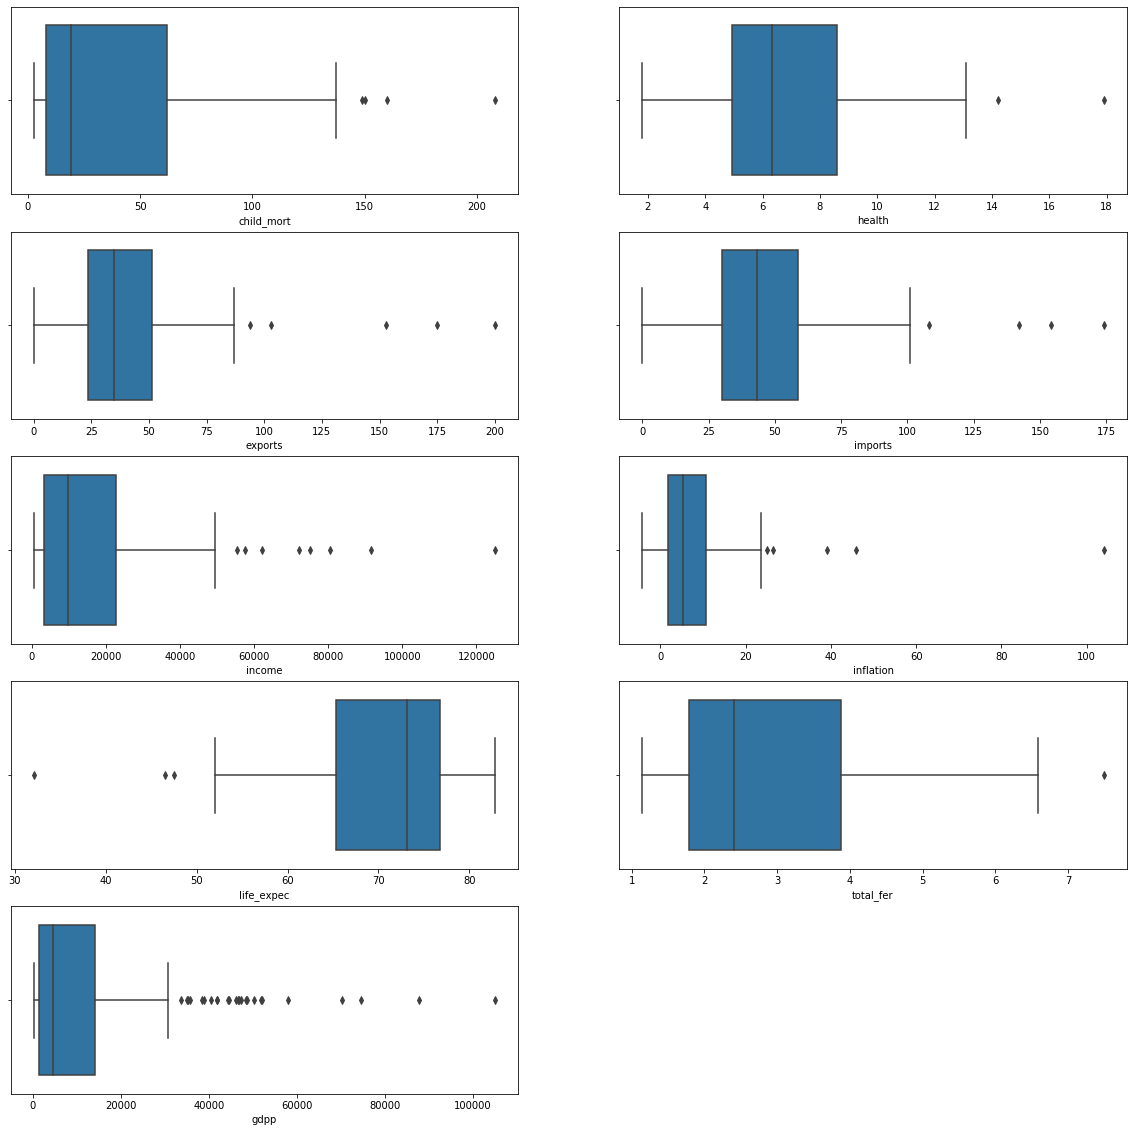

In [185]:
#Checking for outliers in dat
col=[ 'child_mort',  'health', 'exports','imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i  in enumerate(col):
    plt.subplot(len(col)//2+1,2,i[0]+1)
    sns.boxplot(x=dat[i[1]])

In [186]:
#**Since there are huge number of outliers for gdpp, capping to closer by outliers (<55000)
#**Since there are more than 5 outliers for income, capping farther oens to nearer one(<60000)

#Setting threshold for capping
threshold=[145,14,100,125,60000,24,50,7,55000]

In [187]:
#**life_expec has outlier on lower side

# Capping the outliers base don threshold
for i in range(0,len(col)):
    th=threshold[i]
    c=col[i]
    if(c=='life_expec' ):
        dat[c]=dat[c].apply(lambda x: dat[dat[c]>th][c].min() if x<th else x )
    else:
        dat[c]=dat[c].apply(lambda x: dat[dat[c]<th][c].max() if x>th else x )
        
        

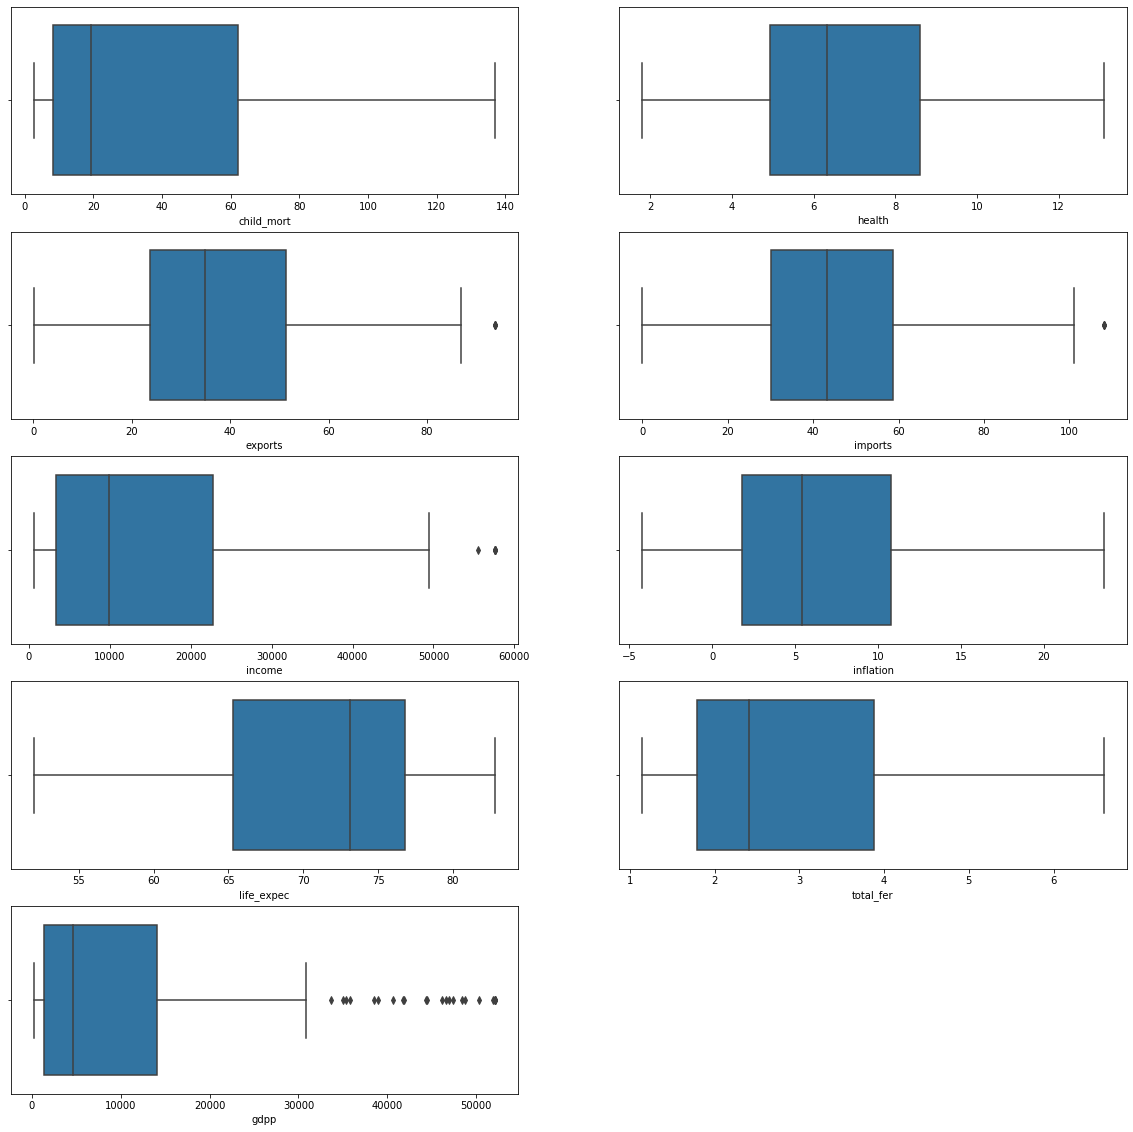

In [188]:
#Re-Checking for outliers
plt.figure(figsize=(20,20))
for i  in enumerate(col):
    plt.subplot(len(col)//2+1,2,i[0]+1)
    sns.boxplot(x=dat[i[1]])

In [189]:
#copy data to modified dataframe
dat_mod=dat.copy()

In [190]:
#Creating dervied column Ratio of export-import 
#which should be greater than 1 for developed countries. 
#Close to 0 for under developed countries
dat_mod['expimp_ratio']=dat['exports']/dat['imports']
#dat['expimp_ratio'].max()
dat_mod=dat_mod.drop(['exports','imports'],axis=1)
#Creating derived column Ratio of income to GDDP which 
#should be greater or equal 1 for developed countries.
#Close to 0 for under developed countries
dat_mod['gin_ratio']=dat['income']/dat['gdpp']
dat_mod=dat_mod.drop(['income'],axis=1)


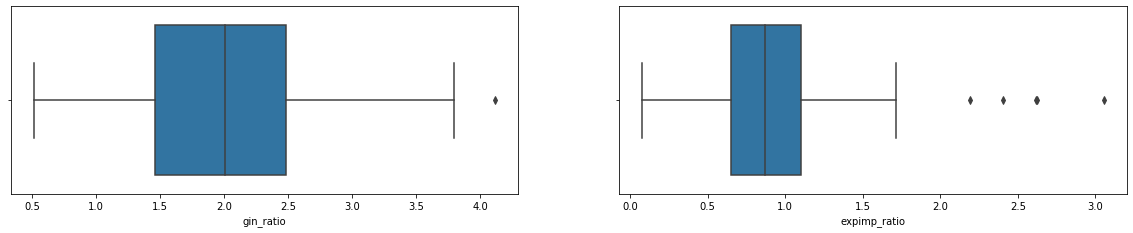

In [191]:
#Checking for outliers for new columns
plt.figure(figsize=(20,20))
for i  in enumerate(['gin_ratio','expimp_ratio']):
    plt.subplot(len(col)//2+1,2,i[0]+1)
    sns.boxplot(x=dat_mod[i[1]])

In [192]:
#removing countries falling in outliers

dat_mod=dat_mod[dat_mod['gin_ratio']<4]
dat_mod=dat_mod[dat_mod['expimp_ratio']<2]

In [193]:
dat_mod.shape

(161, 9)

In [194]:
dat_mod.describe()

,child_mort,health,inflation,life_expec,total_fer,gdpp,expimp_ratio,gin_ratio
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,37.557764,6.915901,6.837801,70.686957,2.953043,11728.472050,0.867615,1.993385
std,38.291320,2.575013,6.661174,8.403929,1.515262,15227.366085,0.334845,0.735229
min,2.600000,1.970000,-4.210000,52.000000,1.150000,231.000000,0.079137,0.513889
25%,7.800000,5.070000,1.740000,65.300000,1.780000,1310.000000,0.642702,1.436975
50%,19.300000,6.550000,4.490000,73.100000,2.410000,4560.000000,0.868519,2.013699
75%,62.000000,8.730000,9.810000,76.700000,3.910000,13500.000000,1.084393,2.479508
max,137.000000,13.100000,23.600000,82.800000,6.590000,52100.000000,1.714607,3.792308


In [195]:
# for  i  in col:
#     #print(dat[i].max())
# #     q=i+'=="'+str(dat[i].max())+'"'
# #     print(dat.query(q)['country'])
#     print('{}:   \t{}\t{}\t{}\t{}'.format(i,round(dat[i].quantile(0.99),2),round(dat[i].quantile(0.01),2),dat[i].max(),dat[i].min()))
#     #print()

In [196]:
col

['child_mort',
 'health',
 'exports',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [197]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Data Preparation

In [198]:
#Preparing dataframe for scaling
Country=dat_mod['country']
dat1=dat_mod.drop('country',axis=1)

In [199]:
# Apply standard scaler

scaler = StandardScaler()
dat2 =scaler.fit_transform(dat1)

In [200]:
dat2.max()

2.659520513000989

In [201]:
dat_mod.head()

,country,child_mort,health,inflation,life_expec,total_fer,gdpp,expimp_ratio,gin_ratio
0,Afghanistan,90.2,7.58,9.44,56.2,5.82,553,0.222717,2.911392
1,Albania,16.6,6.55,4.49,76.3,1.65,4090,0.576132,2.427873
2,Algeria,27.3,4.17,16.10,76.5,2.89,4460,1.222930,2.892377
3,Angola,119.0,2.85,22.40,60.1,6.16,3530,1.452214,1.671388
4,Antigua and Barbuda,10.3,6.03,1.44,76.8,2.13,12200,0.772496,1.565574


##### Creating principal components

In [202]:
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(dat2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [203]:
#first coponent of the first vector obtained from pca.components_
pca.components_

array([[-0.43073337,  0.23270167, -0.26084831,  0.44552114, -0.41411004,
         0.40816954,  0.16972826, -0.35621705],
       [ 0.21030637,  0.53313562, -0.41332453, -0.1865685 ,  0.2056633 ,
         0.07207599, -0.58655514, -0.27267819],
       [ 0.30878269,  0.20609786,  0.34842757, -0.14792712,  0.37951589,
         0.41281945,  0.47824095, -0.41919697],
       [-0.19839787,  0.5934431 ,  0.68492969,  0.12437363, -0.12470181,
        -0.07650268, -0.21662386,  0.23566288],
       [-0.15942635, -0.46946463,  0.37493795,  0.21115287,  0.15876445,
         0.01704052, -0.50997286, -0.53240337],
       [ 0.15636041, -0.1561906 , -0.0132958 ,  0.28734878,  0.20859712,
         0.70137278, -0.25030946,  0.51992159],
       [ 0.10712219, -0.14855806,  0.16096319, -0.61728719, -0.63063642,
         0.36233802, -0.16790041, -0.04817712],
       [ 0.75775394,  0.01016136,  0.06265899,  0.47026964, -0.40026419,
        -0.16860347, -0.02423622, -0.10677117]])

In [204]:
pca.explained_variance_ratio_

array([0.50817293, 0.1907328 , 0.12004154, 0.07835643, 0.04261604,
       0.03201901, 0.01817284, 0.00988842])

Text(0, 0.5, 'Cumulative Variance')

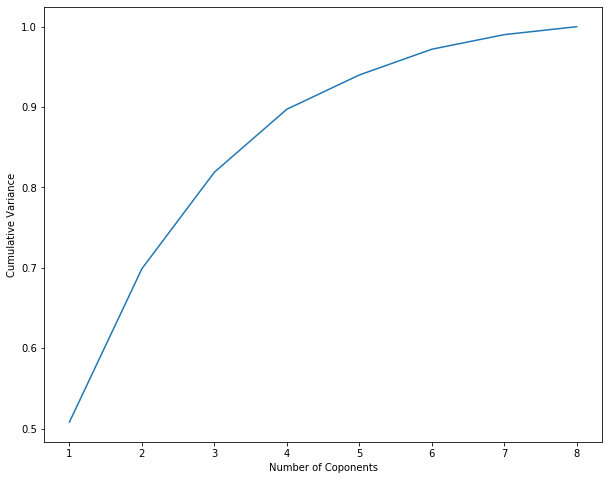

In [205]:
#Plotting the scree plot with cumulative variance
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot( [1,2,3,4,5,6,7,8],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

In [206]:
pca_final = IncrementalPCA(n_components = 4)

In [207]:
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(161, 4)

In [208]:
# Create a dataframe with the PCs obtained
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3]})

In [209]:
# Check the head of the resultant data
pca_df2.head()

,PC1,PC2,PC3,PC4
0,-3.267075,-1.723865,-0.163956,0.471685
1,0.386574,0.035385,-1.621403,0.332590
2,-0.622728,2.332880,-0.136123,0.563301
3,-3.107564,1.642189,2.944881,-0.664390
4,1.162575,-0.077692,-0.766713,-0.562585


In [210]:
pca_df2 = pd.DataFrame({'country': list(Country), 'PC1': pc[0], 'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [211]:
pca_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-3.267075,-1.723865,-0.163956,0.471685
1,Albania,0.386574,0.035385,-1.621403,0.332590
2,Algeria,-0.622728,2.332880,-0.136123,0.563301
3,Angola,-3.107564,1.642189,2.944881,-0.664390
4,Antigua and Barbuda,1.162575,-0.077692,-0.766713,-0.562585


# Clustering

In [212]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [213]:
#Check the Hopkins measure
hopkins(pca_df2.drop('country', axis=1))
#hopkins(pca_df2)

0.6776915277278853

In [214]:
#**Since hopkin's measure is about 0.7-0.8 , PC formed looks good for use

In [215]:
#Dropping the country column for performing clustering
dat3_1 = pca_df2.drop('country', axis = 1)

In [216]:
#Inspecting the data
dat3_1.head()

,PC1,PC2,PC3,PC4
0,-3.267075,-1.723865,-0.163956,0.471685
1,0.386574,0.035385,-1.621403,0.332590
2,-0.622728,2.332880,-0.136123,0.563301
3,-3.107564,1.642189,2.944881,-0.664390
4,1.162575,-0.077692,-0.766713,-0.562585


##### Silhouette score analysis

Text(0.5, 1.0, 'Silhoutte score Analysis')

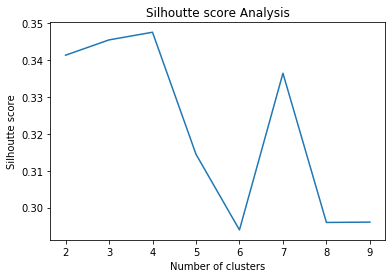

In [217]:
#silhouette score analysis


ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k,random_state=50).fit(dat3_1)
    #print(kmeans.labels_)
    ss.append([k, silhouette_score(dat3_1, kmeans.labels_,random_state=42)])
#print(ss)
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.title('Silhoutte score Analysis')


##### Elbow Curve Method

Text(0.5, 1.0, 'Elbow curve method')

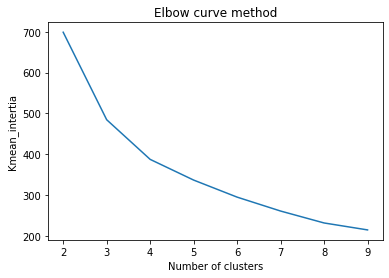

In [218]:
#elbow curve method

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.xlabel('Number of clusters')
plt.ylabel('Kmean_intertia')
plt.title('Elbow curve method')


In [219]:
#**We see that 3 or 4 can be chosen. Silhoutte's score is better for 4, hence going for 4

# K-mean Cluster Analysis

In [220]:
#Peform K means using K=3
model_kmean = KMeans(n_clusters = 4, random_state = 50)
model_kmean.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [221]:
pca_df2.columns

Index(['country', 'PC1', 'PC2', 'PC3', 'PC4'], dtype='object')

In [222]:
#Add the cluster Ids to the PCs data 
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
dat_km.columns = ['country', 'PC1', 'PC2', 'PC3','PC4', 'cluster_ID']
dat_km.head()

,country,PC1,PC2,PC3,PC4,cluster_ID
0,Afghanistan,-3.267075,-1.723865,-0.163956,0.471685,1
1,Albania,0.386574,0.035385,-1.621403,0.332590,0
2,Algeria,-0.622728,2.332880,-0.136123,0.563301,3
3,Angola,-3.107564,1.642189,2.944881,-0.664390,3
4,Antigua and Barbuda,1.162575,-0.077692,-0.766713,-0.562585,0


In [223]:
dat_km['cluster_ID'].unique()

array([1, 0, 3, 2], dtype=int64)

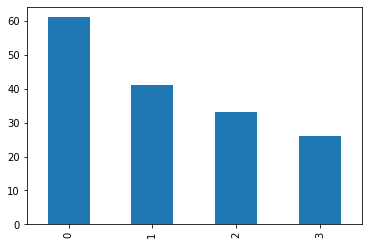

In [224]:
# Check the count of observation per cluster
dat_km['cluster_ID'].value_counts().plot(kind = 'bar')

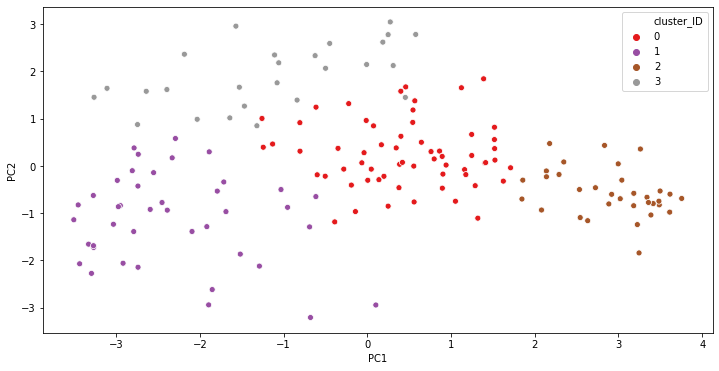

In [225]:
# Cluster scatter plot with respect to PC
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster_ID', data = dat_km, palette='Set1')

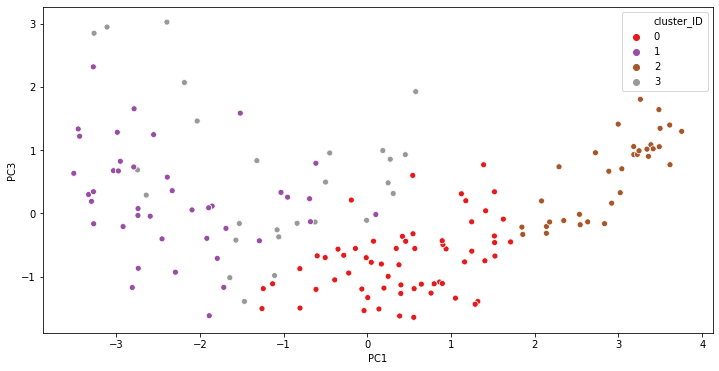

In [226]:
# Plot the Cluster with respect to the PC
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'PC1', y = 'PC3', hue = 'cluster_ID', data = dat_km, palette='Set1')

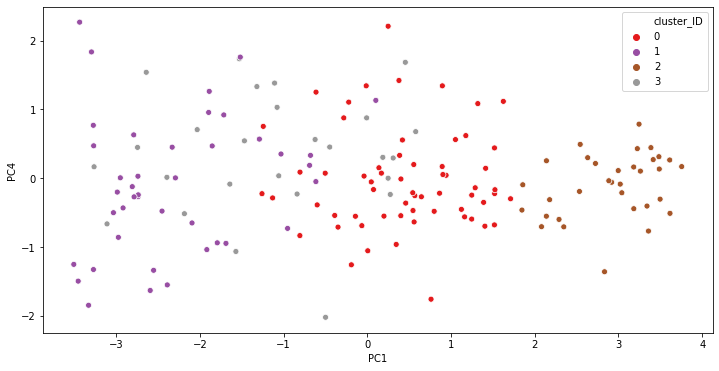

In [227]:
# Cluster scatter plot with respect to PC
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'PC1', y = 'PC4', hue = 'cluster_ID', data = dat_km, palette='Set1')

In [228]:
#**Now the clusters have been formed

In [229]:
# Let's merge the original data with the data(cluster_ID)
dat5 = pd.merge(dat, dat_km[['country', 'cluster_ID']], on = 'country')

In [230]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


##### K-mean Cluster Analyis

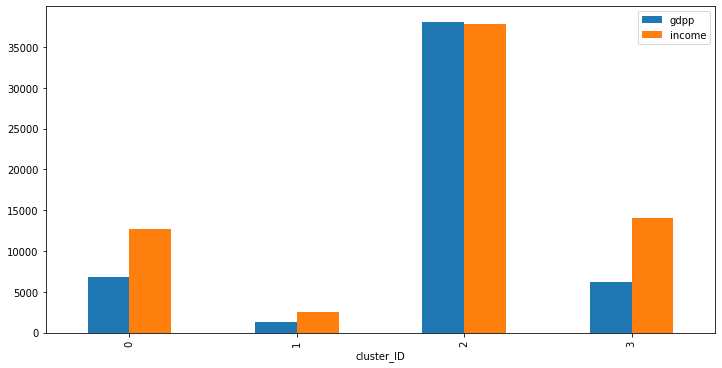

In [231]:
#Bar  plot of average of various variables of each cluster
ax=dat5[['gdpp', 'income','cluster_ID']].groupby('cluster_ID').mean().plot(kind = 'bar',figsize=(12,6))


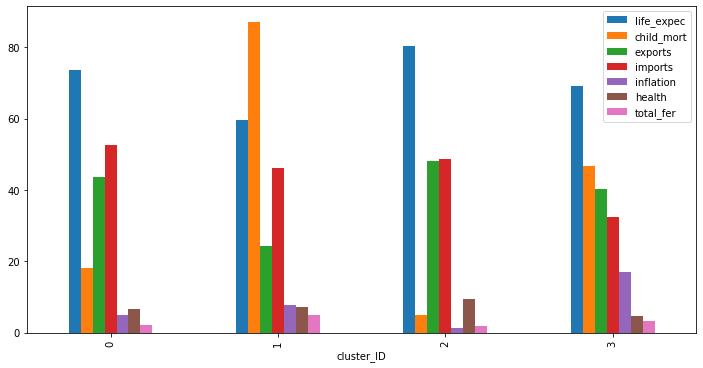

In [232]:
ax=dat5[['life_expec','child_mort', 'exports','imports','inflation','health','total_fer','cluster_ID']].groupby('cluster_ID').mean().plot(kind = 'bar',figsize=(12,6))


In [233]:
#*************#
#From above graphs it is very clear that cluster 1 has a very low gdpp with a very high child moratilty rate. 
#Also note that export is much less than import for this group
#But income per person is slightly greater than gdpp
#Inflation is also on the higher side
#Total fertility is highest which could be a reason for low gdpp
#Life expectancy is least for this group inspite of health spend being average, probably due to high population
#*************#

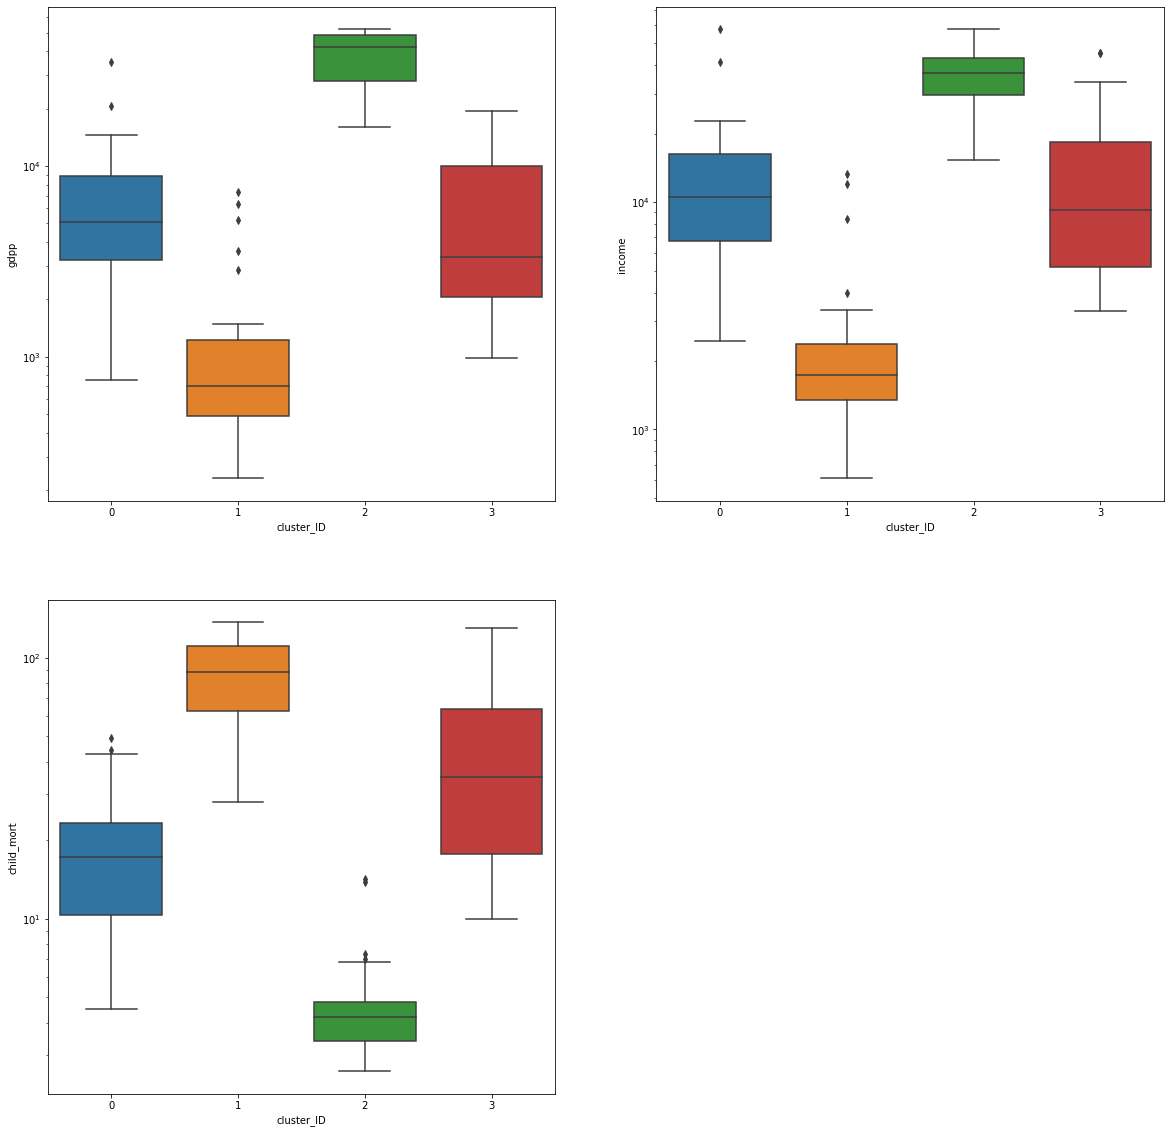

In [234]:
# Check spread of variables in each cluster
plt.figure(figsize = (20,20))
var = ['gdpp','income','child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'cluster_ID', y = i[1], data = dat5)
    plt.yscale('log')

In [235]:
#**Clearly cluster 1 is our target which has the countries we are looking for

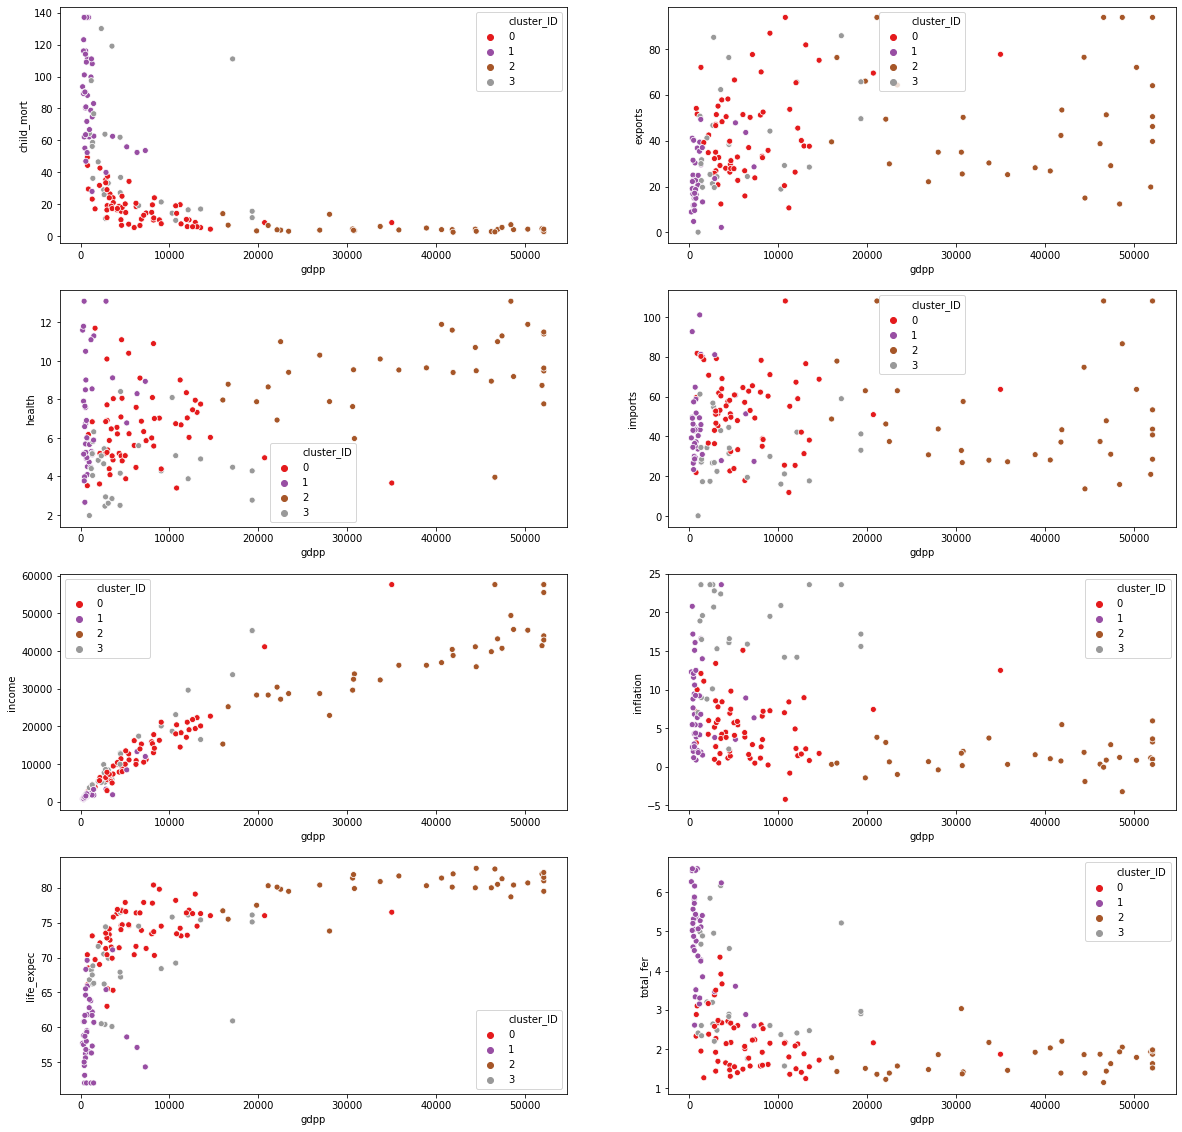

In [236]:
# Plot the Cluster for various variables with respect to the GDPP
plt.figure(figsize=(20,20))
j=0
for i in dat5.columns:
    if(i != 'country'and i!='cluster_ID' and i!='gdpp'):
        j=j+1
        plt.subplot(4,2,j)
        sns.scatterplot(x = 'gdpp', y = i, hue = 'cluster_ID', data = dat5, palette='Set1',legend='full')

In [237]:
#*************#
#From above graph we notice similar to seen in bar graph
#Child mortality is more for lower gdpp
#Exports is  very low for lower gdpp
#Health spending is more or less average for lower gdpp
#Imports is low to average for lower gdpp
#Income per person is low for lower gdpp
#Few countries with high inflation are with low gdpp
#life expectancy is low for lower gdpp
#total_fer is high for lower gdpp
#*************#

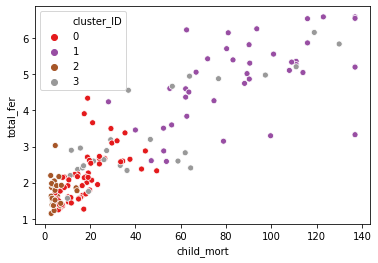

In [238]:
 sns.scatterplot(x = 'child_mort', y = 'total_fer', hue='cluster_ID', data = dat5, palette='Set1',legend='full')

In [239]:
#**Clearly child mortality rate is low when  fertility rate is low
#**For cluster 1 both are high

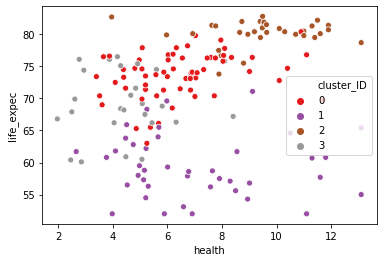

In [240]:
 sns.scatterplot(x = 'health', y = 'life_expec', hue='cluster_ID', data = dat5, palette='Set1',legend='full')

In [241]:
#** When health spending is more, life expectancy is more
#** But in case of lower gdpp, with morehealth spending also, life expectancy is less probably due to population

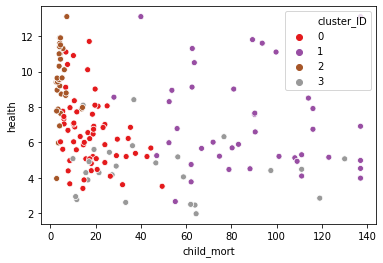

In [242]:
 sns.scatterplot(x = 'child_mort', y = 'health', hue='cluster_ID', data = dat5, palette='Set1',legend='full')

In [243]:
#**clearly child mortality rate is not related to health spending

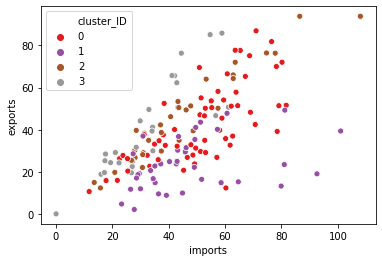

In [244]:
 sns.scatterplot(x = 'imports', y = 'exports', hue='cluster_ID', data = dat5, palette='Set1',legend='full')

In [245]:
#**cluster 1 is mostly on lower half of the graph indicating exports is less as compared to imports
#**This indicates that more the imports and less the exports, gddp tends to be low

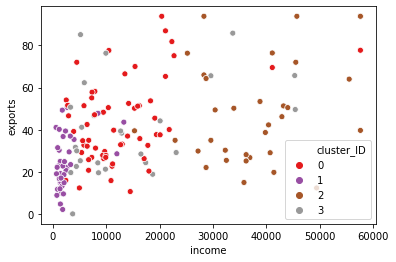

In [246]:
 sns.scatterplot(x = 'income', y = 'exports', hue='cluster_ID', data = dat5, palette='Set1',legend='full')

In [247]:
#**Where export  is less, income per person tends to be low

In [248]:
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


##### Cluster  Profiling

In [249]:
#countries in cluster 1 sorted by other columns
final_km=dat5[dat5['cluster_ID'] ==1].sort_values(by=['gdpp','income','exports','imports','inflation','health','child_mort'],ascending=[1,1,1,0,0,1,0])

In [250]:
len(final_km)

41

In [251]:
full_final_km=pd.merge(final_km,dat_mod)
full_final_km.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID,expimp_ratio,gin_ratio
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000
mean,87.090244,24.338780,7.030732,46.031707,2463.975610,7.854512,59.448780,4.856585,1264.682927,1.0,0.557802,2.311600
std,29.742191,12.321913,2.699775,18.685990,2670.729924,5.682783,4.857732,1.136564,1579.390190,0.0,0.268589,0.636232
min,28.100000,2.200000,2.660000,23.300000,609.000000,0.885000,52.000000,2.590000,231.000000,1.0,0.079137,0.513889
25%,62.600000,15.300000,5.130000,33.600000,1350.000000,3.560000,56.300000,4.240000,488.000000,1.0,0.319149,2.030534
50%,88.200000,22.800000,6.010000,43.000000,1730.000000,6.390000,58.700000,5.060000,702.000000,1.0,0.607143,2.265861
75%,111.000000,31.500000,8.550000,51.300000,2380.000000,11.600000,62.200000,5.560000,1220.000000,1.0,0.701389,2.641243
max,137.000000,50.600000,13.100000,101.000000,13300.000000,23.600000,71.100000,6.590000,7280.000000,1.0,1.197411,3.491228


In [252]:
full_final_km['expimp_ratio']=full_final_km['expimp_ratio'].apply(lambda x:round(x,2))
#full_final_km=full_final_km['expimp_ratio'].apply(lambda x:round(x,2))
full_final_km['gin_ratio']=full_final_km['gin_ratio'].apply(lambda x:round(x,2))
full_final_km=full_final_km[(full_final_km['expimp_ratio']<0.55)|(full_final_km['gin_ratio']<2)]

In [253]:
#full_final_km[(full_final_km['expimp_ratio']<0.55)]

In [254]:
len(full_final_km)

22

In [255]:
full_final_km=full_final_km.sort_values(by=['expimp_ratio','gin_ratio','gdpp','income','exports','imports','life_expec','inflation','health','child_mort'],ascending=[1,0,1,1,1,0,1,0,1,0])[['country','expimp_ratio','gin_ratio','gdpp','income','exports','imports','life_expec','inflation','health','child_mort','total_fer']]

In [256]:
full_final_km

,country,expimp_ratio,gin_ratio,gdpp,income,exports,imports,life_expec,inflation,health,child_mort,total_fer
37,Timor-Leste,0.08,0.51,3600,1850,2.20,27.8,71.1,23.60,9.12,62.6,6.23
35,Kiribati,0.17,1.16,1490,1730,13.30,79.9,60.7,1.52,11.30,62.7,3.84
9,Eritrea,0.21,2.95,482,1420,4.79,23.3,61.7,11.60,2.66,55.2,4.61
1,Liberia,0.21,2.14,327,700,19.10,92.6,60.8,5.47,11.80,89.3,5.02
12,Afghanistan,0.22,2.91,553,1610,10.00,44.9,56.2,9.44,7.58,90.2,5.82
0,Burundi,0.23,3.31,231,764,8.92,39.2,57.7,12.30,11.60,93.6,6.26
19,Haiti,0.24,2.27,662,1500,15.30,64.7,52.0,5.45,6.91,137.0,3.33
22,Tajikistan,0.25,2.86,738,2110,14.90,58.6,69.6,12.50,5.98,52.4,3.51
16,Nepal,0.26,3.36,592,1990,9.58,36.4,68.3,15.10,5.25,47.0,2.61
36,"Micronesia, Fed. Sts.",0.29,1.17,2860,3340,23.50,81.0,65.4,3.80,13.10,40.0,3.46


In [257]:
#To present first 10 countries in dire need of aid
final_km.head(10)['country']

24                      Burundi
84                      Liberia
35             Congo, Dem. Rep.
108                       Niger
126                Sierra Leone
89                   Madagascar
102                  Mozambique
29     Central African Republic
90                       Malawi
48                      Eritrea
Name: country, dtype: object

# Single linkage algorithm  hierarchical clustering

In [258]:
#copy of dat to concatenate for result
dat_single=dat.merge(dat_mod,how='inner').drop(['expimp_ratio','gin_ratio'],axis=1)
dat_single.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [259]:
#dat.merge(dat_mod,how='inner').drop(['expimp_ratio','gin_ratio'],axis=1)

In [260]:
dat_single.shape

(161, 10)

In [261]:
pca_df2.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-3.267075,-1.723865,-0.163956,0.471685
1,Albania,0.386574,0.035385,-1.621403,0.332590
2,Algeria,-0.622728,2.332880,-0.136123,0.563301
3,Angola,-3.107564,1.642189,2.944881,-0.664390
4,Antigua and Barbuda,1.162575,-0.077692,-0.766713,-0.562585


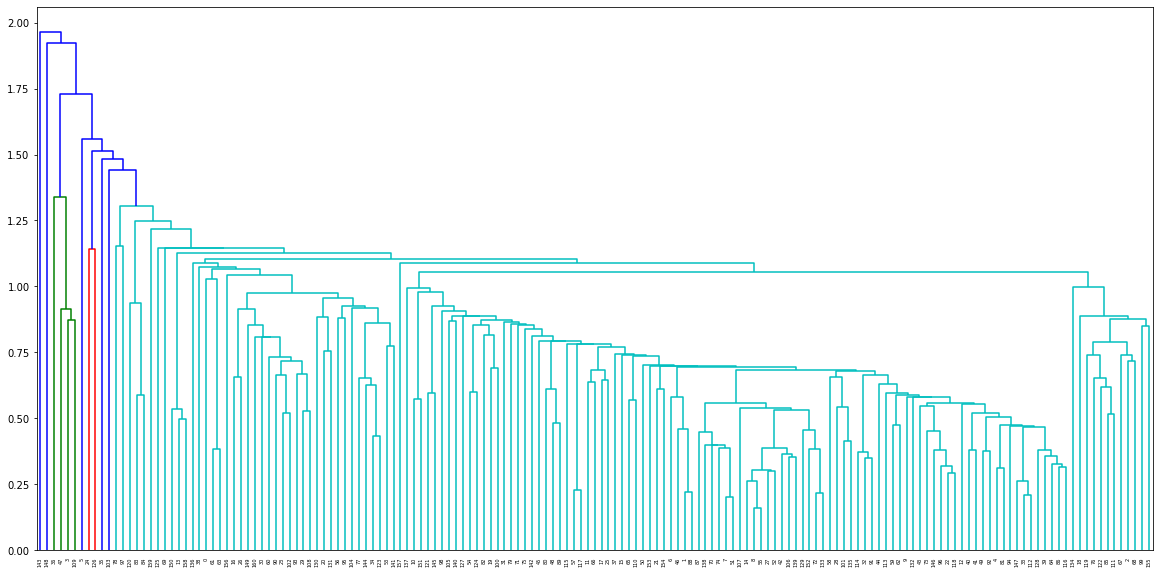

In [262]:
# single linkage
pca_single=pca_df2[['PC1','PC2','PC3','PC4']]
plt.figure(figsize=(20,10))
mergings = linkage(pca_single, method="single", metric='euclidean')
dendrogram(mergings)
plt.savefig('single-dendo.png',bbox_inch='tight')
plt.show()

In [263]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=50).reshape(-1, )
cluster_labels

array([ 0,  1,  2,  3,  1,  4,  1,  1,  1,  1,  5,  1,  1,  6,  1,  1,  7,
        1,  8,  9, 10,  1,  1, 11, 12,  1,  7,  1,  1, 11, 11, 13,  1,  1,
       14, 15, 16,  1, 17,  1,  1,  1,  1,  1,  1,  1,  1, 18,  1,  1,  1,
        1,  1, 19, 20,  1, 21,  1,  1,  1, 11, 22,  1, 22,  1,  1,  1,  2,
        2, 23,  1,  1,  1,  1,  1,  1,  2, 14, 24, 25,  1,  1,  9, 26, 26,
        2,  1,  1,  1,  1, 11,  1,  1, 11,  1, 27,  1, 28, 29, 30,  9,  1,
       11, 31, 32, 33,  1,  1, 11, 34,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        2, 35, 36,  2, 14, 20, 37, 38, 39,  1,  1, 40, 10,  1,  1, 41,  1,
       42, 43,  1,  1, 44, 19,  1, 45, 14, 36,  1,  1, 46, 11,  6,  5,  1,
        1,  1, 30, 47, 48,  6, 49, 11])

In [264]:
dat_single['cluster_ID']=cluster_labels
dat_single.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [265]:
pca_single=pca_df2.copy()
pca_single['cluster_ID']=cluster_labels

##### Analysis

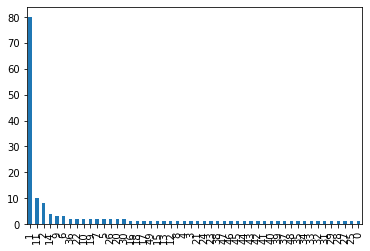

In [266]:
# Check the count of observation per cluster
dat_single['cluster_ID'].value_counts().plot(kind = 'bar')

In [267]:
#pca_single=

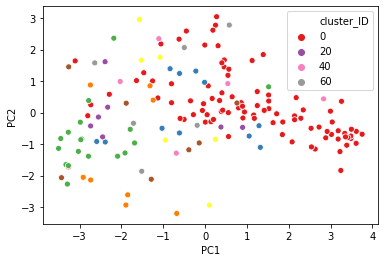

In [268]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster_ID', data = pca_single, palette='Set1')


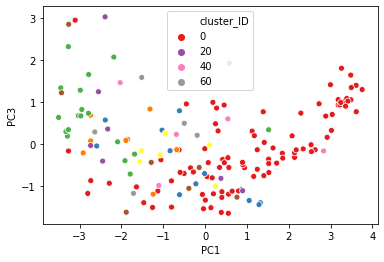

In [269]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC3', hue = 'cluster_ID', data = pca_single, palette='Set1')


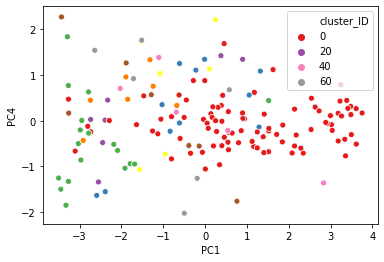

In [270]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC4', hue = 'cluster_ID', data = pca_single, palette='Set1')


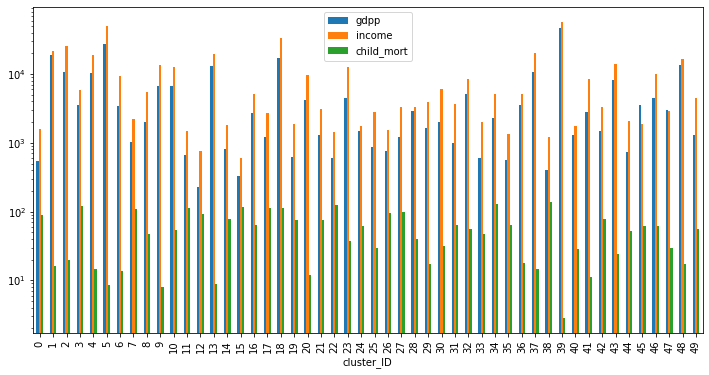

In [271]:
# Bar plot comparing variables cluster-wise
ax=dat_single[['gdpp', 'income','child_mort', 'cluster_ID']].groupby('cluster_ID').mean().plot(kind = 'bar',figsize=(12,6))
y=ax.set_yscale('log')


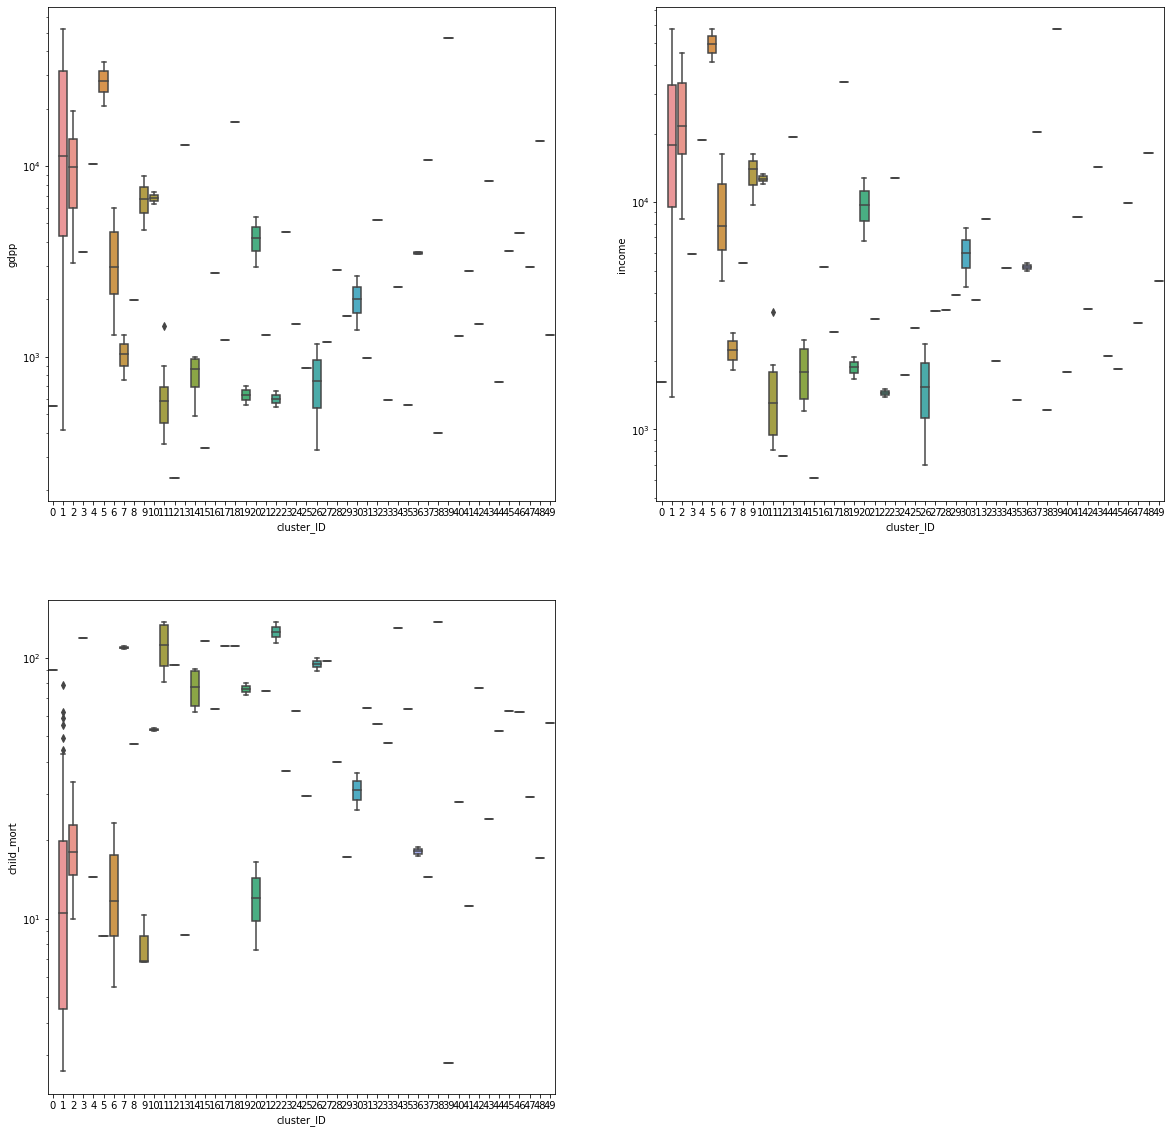

In [272]:
# Check data spread
plt.figure(figsize = (20,20))
var = ['gdpp','income','child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'cluster_ID', y = i[1], data = dat_single)
    plt.yscale('log')


##### Cluster Profiling

In [273]:
single_cluster=round((dat_mod.merge(dat_single)).groupby('cluster_ID').mean(),2)

In [274]:
single_cluster=pd.DataFrame(single_cluster)

In [275]:
#single_cluster['gi_r']=single_cluster['gdpp']/single_cluster['income']

In [276]:
single_cluster.describe()


,child_mort,health,inflation,life_expec,total_fer,gdpp,expimp_ratio,gin_ratio,exports,imports,income
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,56.837000,6.680800,11.010200,66.149600,3.764200,5218.574000,0.839800,2.21340,36.937200,48.318200,9069.791600
std,39.109028,2.816933,7.969672,7.290882,1.529007,8172.984691,0.441544,0.71098,23.145755,22.916035,11750.443194
min,2.800000,1.970000,-4.210000,53.800000,1.150000,231.000000,0.080000,0.51000,0.110000,0.070000,609.000000
25%,18.467500,4.857500,3.902500,60.425000,2.455000,907.000000,0.515000,1.74500,19.975000,34.325000,1903.750000
50%,54.550000,5.915000,9.200000,67.000000,3.720000,2172.500000,0.830000,2.23000,34.060000,44.700000,4195.000000
75%,86.870000,8.332500,18.475000,71.250000,4.972500,5017.500000,1.177500,2.80750,48.925000,58.467500,11972.500000
max,137.000000,13.100000,23.600000,82.700000,6.540000,46600.000000,1.710000,3.77000,93.800000,108.000000,57600.000000


In [277]:
req_cluster=pd.DataFrame(single_cluster.query(' health<7 and child_mort>55 and gdpp<2000 and inflation>11 '))

In [278]:
single_cluster.query('health<7 and child_mort>55 and gdpp<2000 and inflation>11 ')

,child_mort,health,inflation,life_expec,total_fer,gdpp,expimp_ratio,gin_ratio,exports,imports,income
cluster_ID,,,,,,,,,,,
21,74.7,5.22,16.6,62.2,4.27,1310.0,0.64,2.34,29.5,45.9,3060.0
27,97.4,4.41,18.9,68.2,4.98,1200.0,0.83,2.77,50.7,61.2,3320.0
42,76.7,6.32,19.6,66.3,4.88,1480.0,1.15,2.28,19.7,17.2,3370.0
49,56.3,5.18,23.6,67.5,4.67,1310.0,0.87,3.42,30.0,34.4,4480.0


In [279]:
req_cluster.reset_index(inplace=True)
req_cluster

,cluster_ID,child_mort,health,inflation,life_expec,total_fer,gdpp,expimp_ratio,gin_ratio,exports,imports,income
0,21,74.7,5.22,16.6,62.2,4.27,1310.0,0.64,2.34,29.5,45.9,3060.0
1,27,97.4,4.41,18.9,68.2,4.98,1200.0,0.83,2.77,50.7,61.2,3320.0
2,42,76.7,6.32,19.6,66.3,4.88,1480.0,1.15,2.28,19.7,17.2,3370.0
3,49,56.3,5.18,23.6,67.5,4.67,1310.0,0.87,3.42,30.0,34.4,4480.0


In [280]:
list(req_cluster['cluster_ID'])

[21, 27, 42, 49]

In [281]:
final_single=pd.DataFrame()
for i in list(req_cluster['cluster_ID']):
    final_single=pd.concat([final_single,dat_single[(dat_single['cluster_ID']==i)]])
#| (dat_single['cluster_ID']==21)|(dat_single['cluster_ID']==26)|(dat_single['cluster_ID']==41)|(dat_single['cluster_ID']==48)|(dat_single['cluster_ID']==49)]

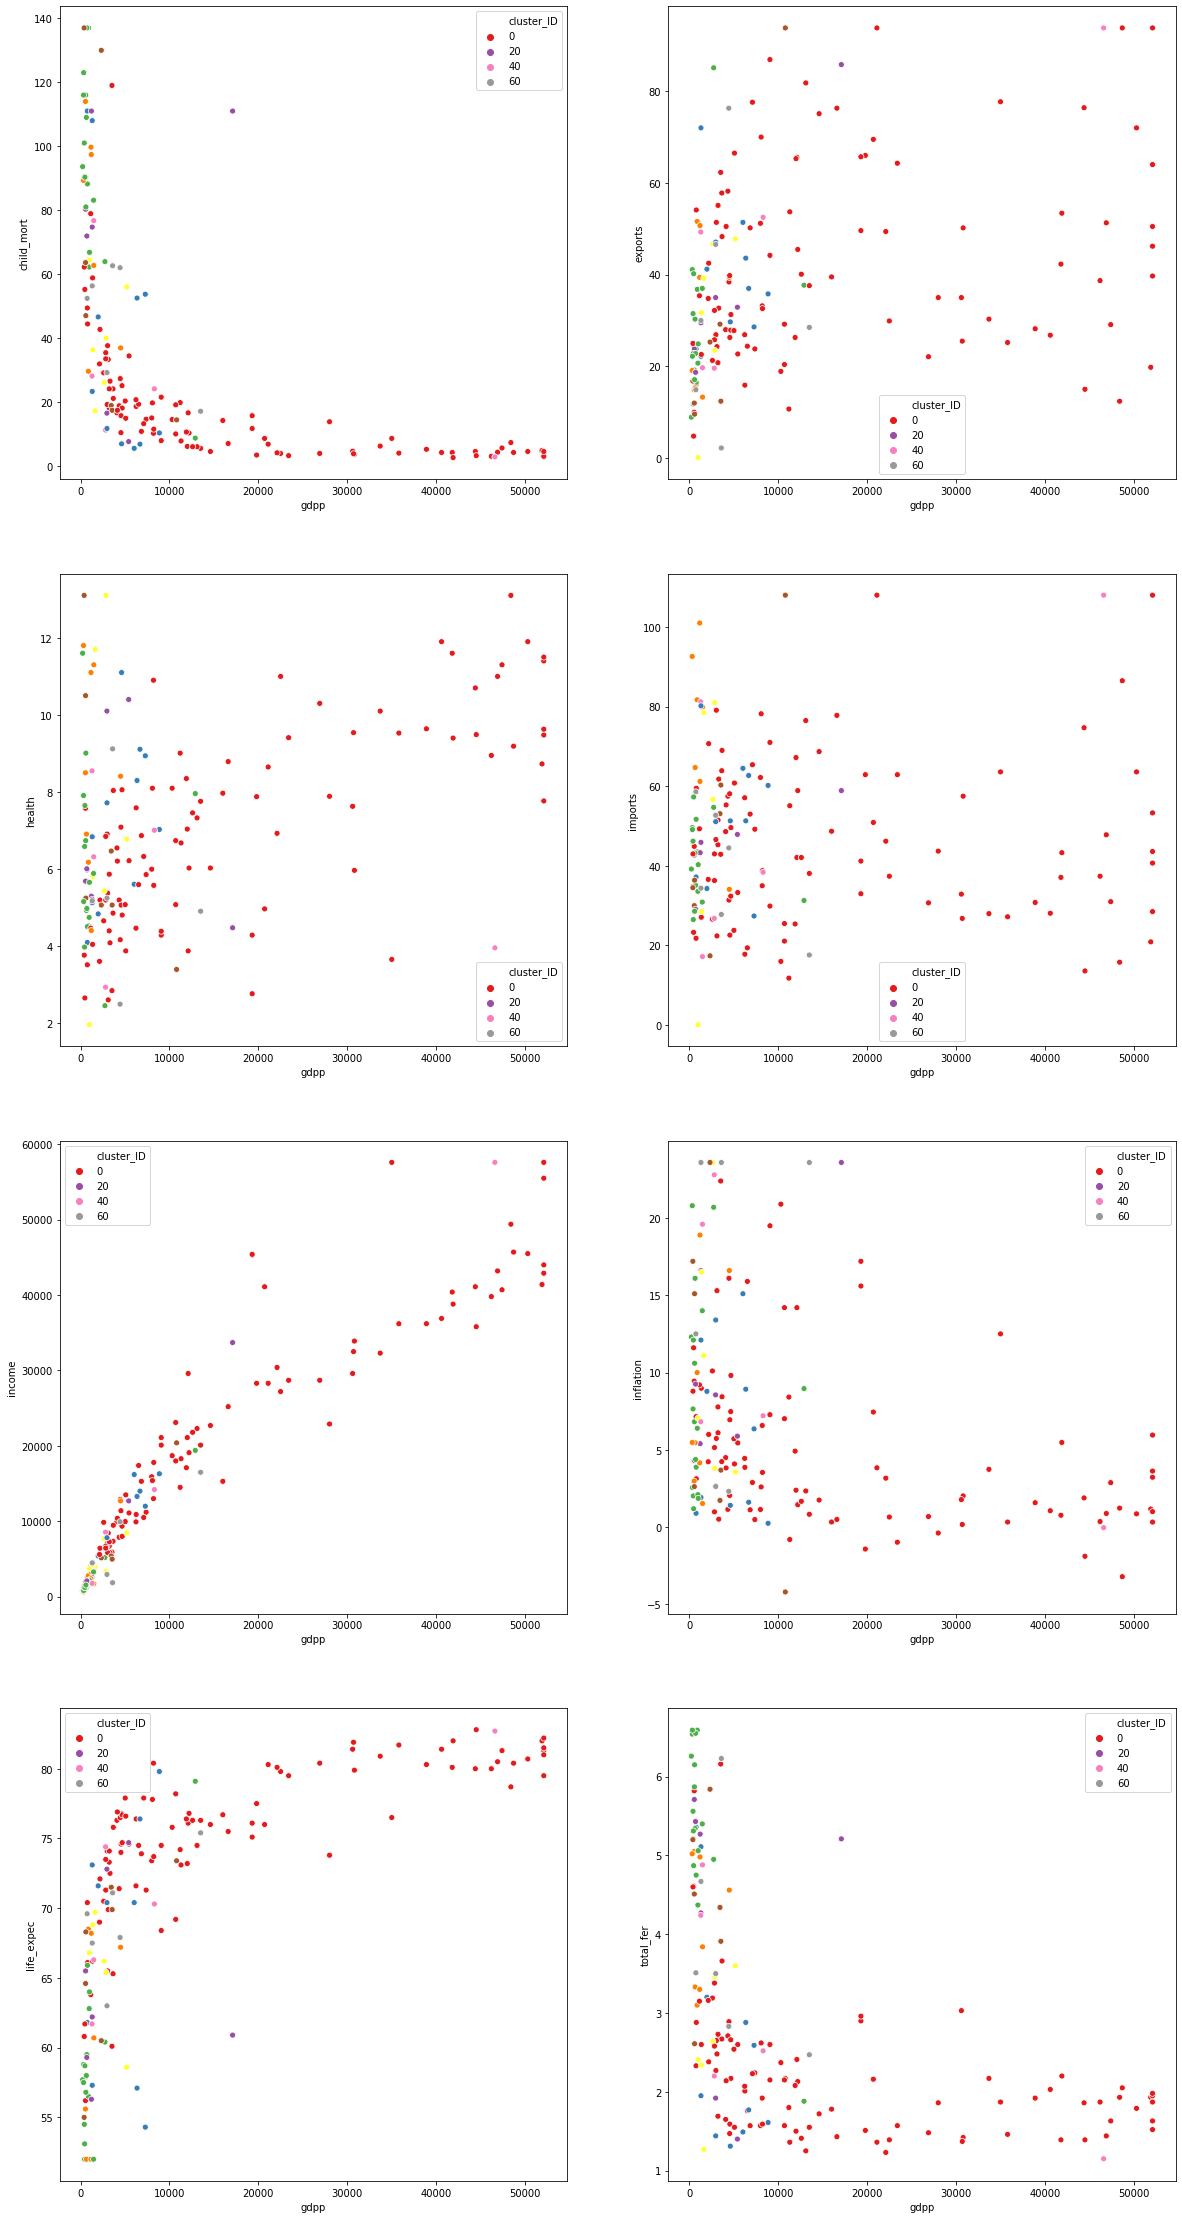

In [282]:
# Plot the Cluster with respect to gddp and other variables
plt.figure(figsize=(20,40))
j=0
for i in dat_single.columns:
    if(i!='gdpp' and i != 'country'and i!='cluster_ID'):
        j=j+1
        plt.subplot(4,2,j)
        ax=sns.scatterplot(x = 'gdpp', y = i, hue = 'cluster_ID', data = dat_single, palette='Set1')
        #ax.legend()
plt.savefig('single-cluster.png',bbox_inches='tight')

In [283]:
final_single

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
56,Ghana,74.7,29.5,5.22,45.9,3060,16.6,62.2,4.27,1310,21
95,Mauritania,97.4,50.7,4.41,61.2,3320,18.9,68.2,4.98,1200,27
136,Sudan,76.7,19.7,6.32,17.2,3370,19.6,66.3,4.88,1480,42
159,Yemen,56.3,30.0,5.18,34.4,4480,23.6,67.5,4.67,1310,49


In [284]:
final_single['country']

56          Ghana
95     Mauritania
136         Sudan
159         Yemen
Name: country, dtype: object

# Complete Linkage algorithm hierarchial clustering

In [285]:
#Data preparation for final dataframe after clusters
dat_comp=dat.merge(dat_mod,how='inner').drop(['expimp_ratio','gin_ratio'],axis=1)
dat_comp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [286]:
dat_comp.shape

(161, 10)

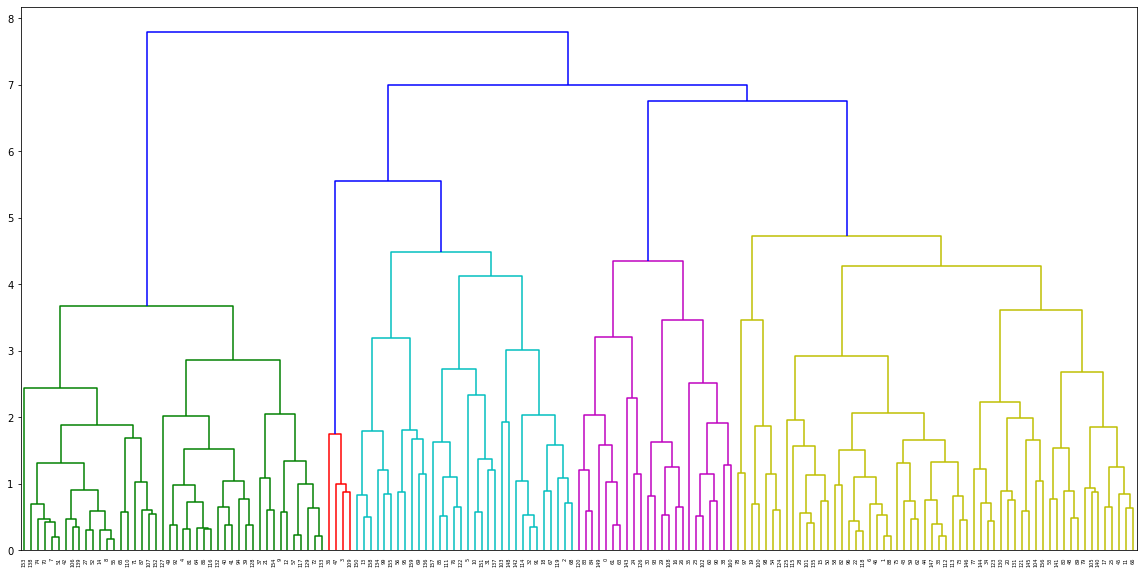

In [287]:
# complete linkage
pca_comp=pca_df2[['PC1','PC2','PC3','PC4']]
plt.figure(figsize=(20,10))
mergings = linkage(pca_comp, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [288]:
# Create 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 2, 2, 3, 2, 1, 3, 3, 3, 2, 1, 3, 2, 3, 1, 0, 1, 2, 1, 1, 3,
       1, 0, 0, 1, 0, 3, 1, 0, 0, 2, 2, 1, 1, 0, 2, 3, 0, 3, 3, 3, 3, 1,
       1, 1, 1, 2, 1, 3, 1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 0, 0, 1, 0, 3, 3,
       1, 2, 2, 2, 3, 3, 3, 1, 3, 1, 2, 1, 1, 1, 1, 3, 1, 0, 0, 2, 3, 3,
       1, 1, 0, 2, 3, 0, 3, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 3, 3, 0, 2,
       3, 2, 1, 1, 2, 1, 3, 3, 1, 2, 0, 1, 2, 1, 1, 1, 0, 3, 3, 3, 1, 1,
       3, 3, 2, 1, 2, 2, 3, 3, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 3, 3,
       3, 2, 1, 2, 2, 2, 0])

In [289]:
#Save custer labels to dataframe
dat_comp['cluster_ID']=cluster_labels
dat_comp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


In [290]:
#Creating PCA dataframe  to plot cluster against PCs
pca_comp=pca_df2.copy()
pca_comp['cluster_ID']=cluster_labels

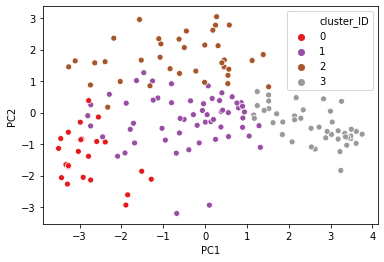

In [291]:
# Plot the Cluster with respect to the PC

sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster_ID', data = pca_comp , palette='Set1')

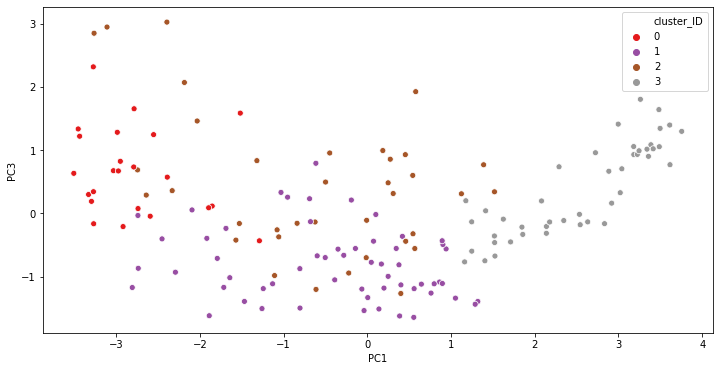

In [292]:
# Plot the Cluster with respect to the PC
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'PC1', y = 'PC3', hue = 'cluster_ID', data = pca_comp , palette='Set1')

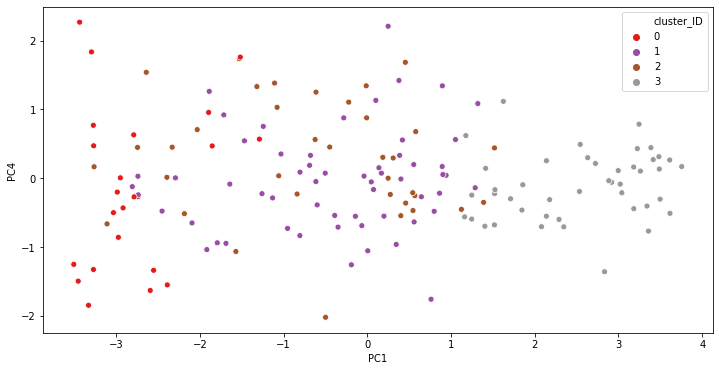

In [293]:
# Plot the Cluster with respect to PC
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'PC1', y = 'PC4', hue = 'cluster_ID', data = pca_comp , palette='Set1')

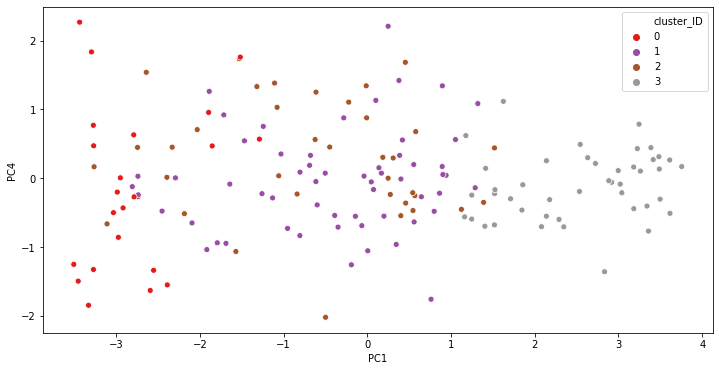

In [294]:
# Plot the Cluster with respect to PC
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'PC1', y = 'PC4', hue = 'cluster_ID', data = pca_comp , palette='Set1')

##### Analysis

Text(0.5, 1.0, 'Country count for Custers')

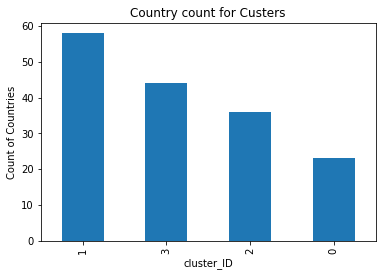

In [295]:
# Check the count of observation per cluster
dat_comp['cluster_ID'].value_counts().plot(kind = 'bar')
plt.xlabel('cluster_ID')
plt.ylabel('Count of Countries')
plt.title('Country count for Custers')

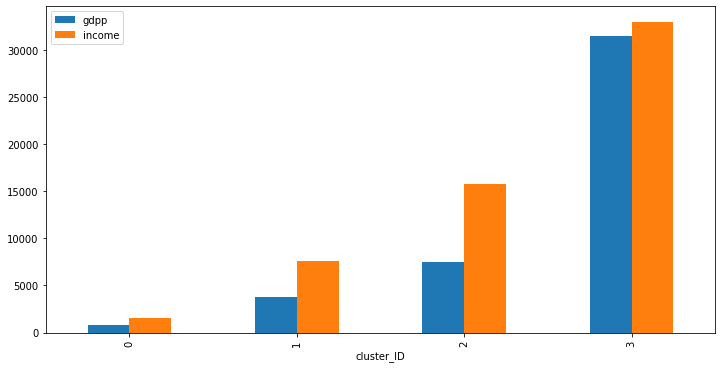

In [296]:
#Bar graph 1 to compare the cluster variables
ax=dat_comp[['gdpp', 'income', 'cluster_ID']].groupby('cluster_ID').mean().plot(kind = 'bar',figsize=(12,6))

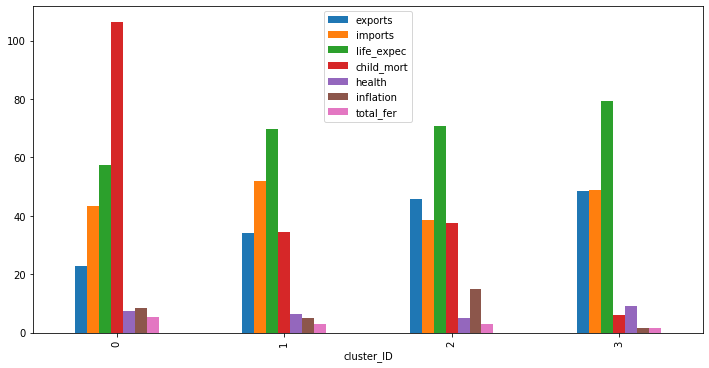

In [297]:
#Bar graph 2 to compare the cluster variables
dat_comp[['exports','imports','life_expec','child_mort','health','inflation','total_fer', 'cluster_ID']].groupby('cluster_ID').mean().plot(kind = 'bar',figsize=(12,6))

In [298]:
#********#
#For cluster 0
#Child mortality is high
#Health spending is average
#Inflation is average
#Exports is low
#Imports is average
#Child Mortality is very high
#Fertility rate is also high
#Life expectancy is low
#***********#

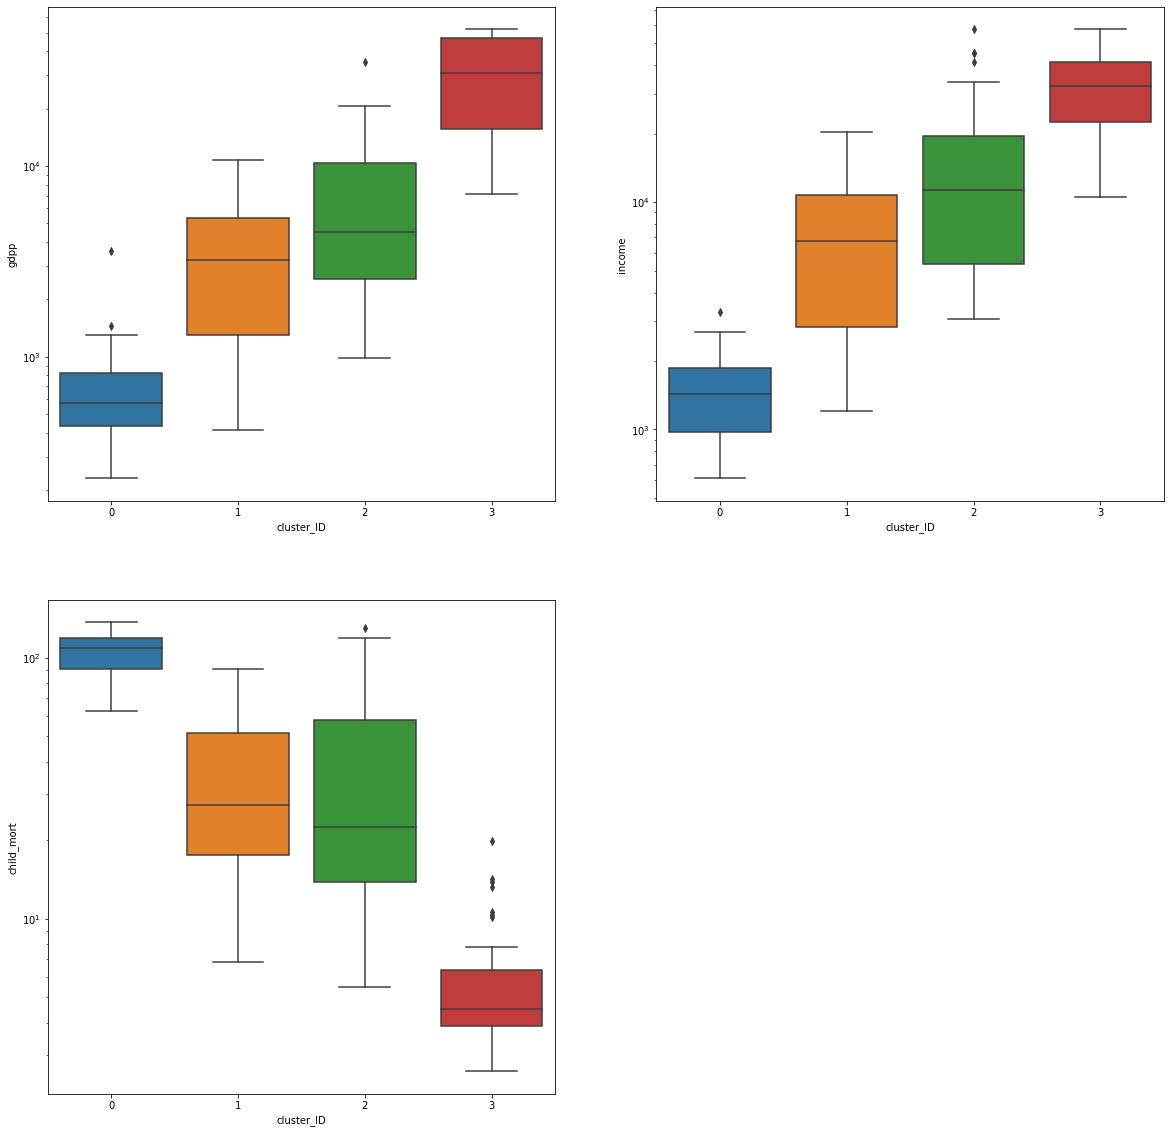

In [299]:
# Check spread of data
plt.figure(figsize = (20,20))
var = ['gdpp','income','child_mort']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'cluster_ID', y = i[1], data = dat_comp)
    plt.yscale('log')


In [300]:
#**From above chart, its clear that cluster 0 has low gddp, income and high child_mort

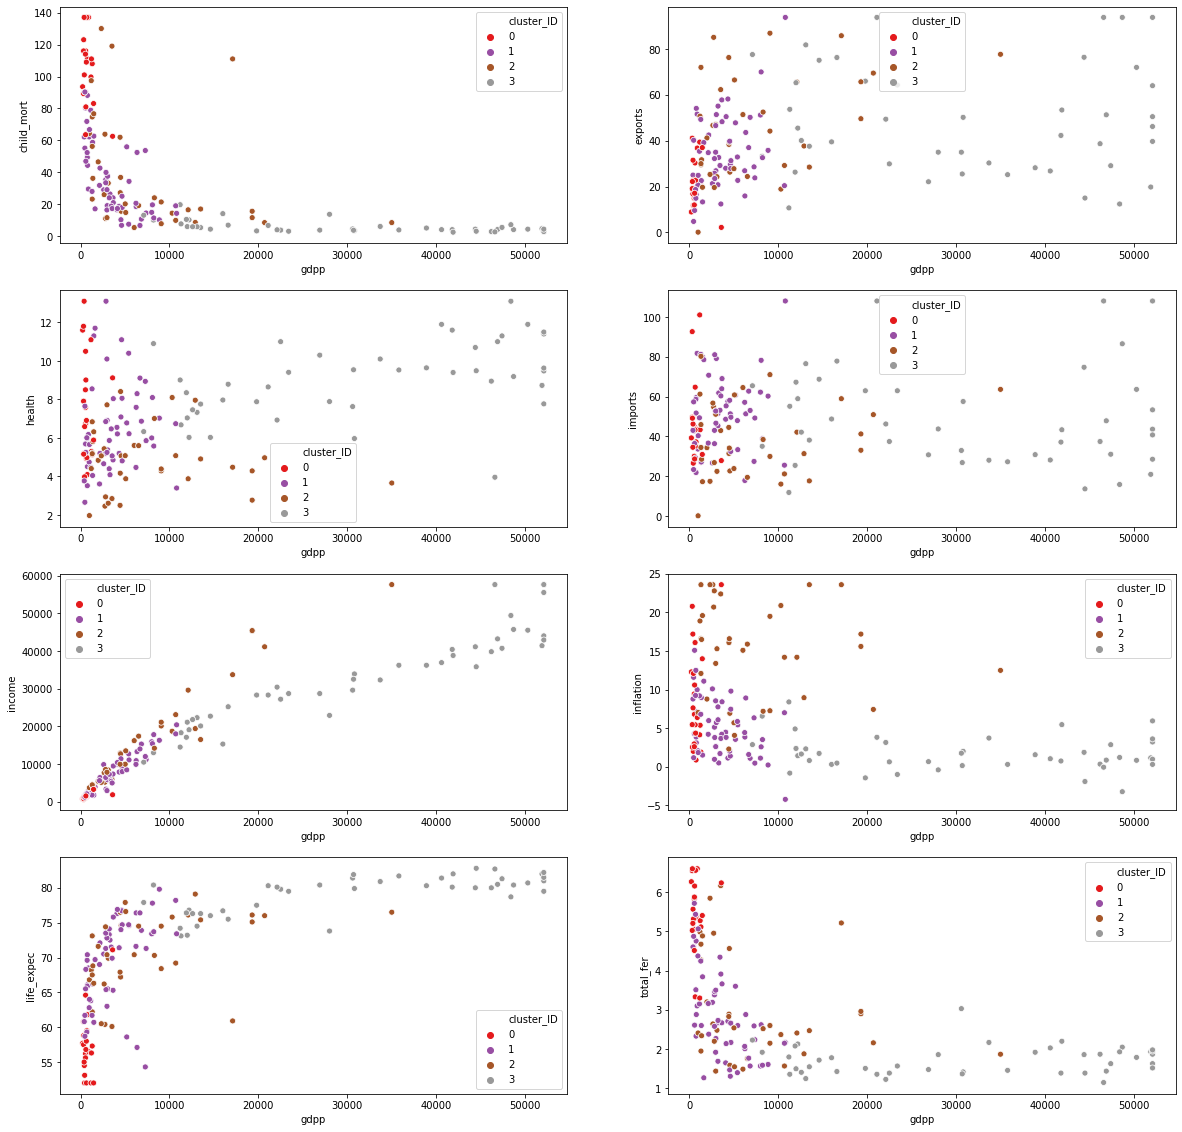

In [301]:
# Plot the Cluster for various variables with respect to the gddp
plt.figure(figsize=(20,20))
j=0
for i in dat_comp.columns:
    if(i!='gdpp' and i != 'country'and i!='cluster_ID'):
        j=j+1
        plt.subplot(4,2,j)
        sns.scatterplot(x = 'gdpp', y = i, hue = 'cluster_ID', data = dat_comp, palette='Set1')

In [302]:
#***********************#
#From above it is very evident that
#Cluster 0 has low gddp 
#child_mortality rate and fertility rate are high for cluster 0 
#life_expec is low for cluster 0
#exports are  low, imports are medium, income per person is low for cluster 0
#inflation and health spending have not particular pattern for cluster 0
#*********************#

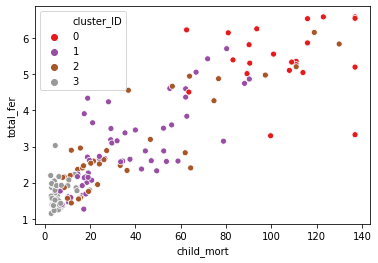

In [303]:
 sns.scatterplot(x = 'child_mort', y = 'total_fer', hue='cluster_ID', data = dat_comp, palette='Set1',legend='full')

In [304]:
#**child mortality rate and total_fer rate is high for cluster 0

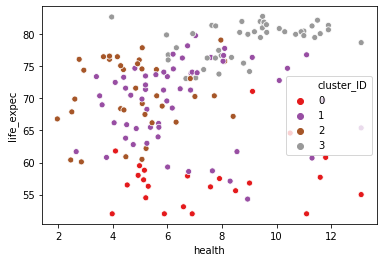

In [305]:
sns.scatterplot(x = 'health', y = 'life_expec', hue='cluster_ID', data = dat_comp, palette='Set1',legend='full')

In [306]:
#**life_expec is more higher health spend
#But for cluster 0, even with more helath spends, life expectancy is low probably due to dense population

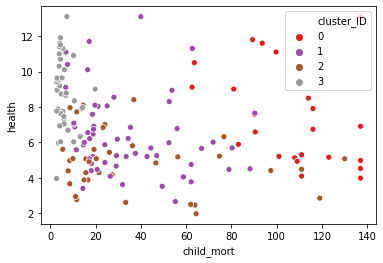

In [307]:
sns.scatterplot(x = 'child_mort', y = 'health', hue='cluster_ID', data = dat_comp, palette='Set1',legend='full')

In [308]:
#** Child mortality rate and health spending does not seem to be related

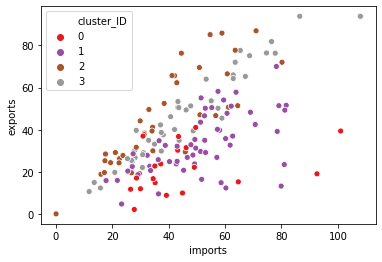

In [309]:
sns.scatterplot(x = 'imports', y = 'exports', hue='cluster_ID', data = dat_comp, palette='Set1',legend='full')

In [310]:
#**exports is very less although imports are average for cluster 0

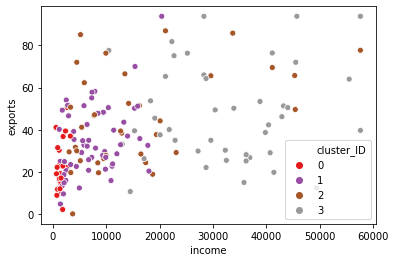

In [311]:
sns.scatterplot(x = 'income', y = 'exports', hue='cluster_ID', data = dat_comp, palette='Set1',legend='full')

In [312]:
#**export is low to  medium but income is very low 

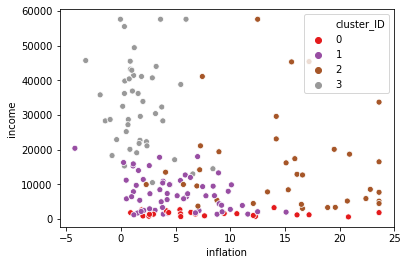

In [313]:
sns.scatterplot(x = 'inflation', y = 'income', hue='cluster_ID', data = dat_comp, palette='Set1',legend='full')

In [314]:
#**many countries have low inflation, still  income is low for cluster 0

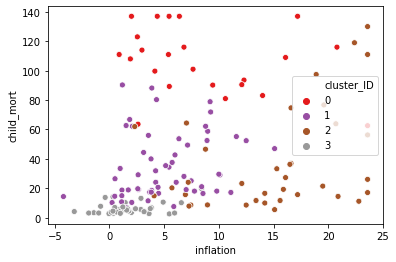

In [315]:
sns.scatterplot(x = 'inflation', y = 'child_mort', hue='cluster_ID', data = dat_comp, palette='Set1',legend='full')

In [316]:
#**child_mort is very high even for low inflation ratesfor cluster 0

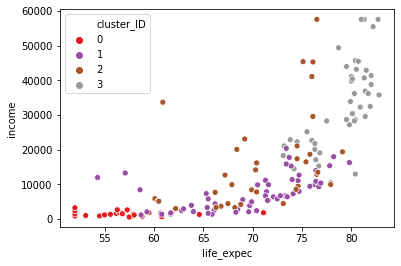

In [317]:
sns.scatterplot(x = 'life_expec', y = 'income', hue='cluster_ID', data = dat_comp, palette='Set1',legend='full')

In [318]:
#** Lower life expectancy indicates lower income

In [319]:
dat_comp.groupby('cluster_ID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_ID,,,,,,,,,
0,106.417391,22.948696,7.376957,43.243478,1540.565217,8.467174,57.260870,5.459565,792.565217
1,34.308621,34.059828,6.428448,51.920690,7570.172414,5.046707,69.574138,2.890345,3729.258621
2,37.466667,45.766917,4.883056,38.607386,15799.444444,14.995278,70.705556,2.963611,7473.833333
3,5.920455,48.559091,8.980682,48.809091,32956.818182,1.672773,79.156818,1.716818,31470.454545


##### Cluster Profiling

In [320]:
#Get cluster 0 data based on sorted values
final_comp=dat_comp[dat_comp['cluster_ID']==0].sort_values(by=['gdpp','income','exports','imports','life_expec','inflation','health','child_mort'],ascending=[1,1,1,0,1,0,1,0])

In [321]:
len(final_comp)

23

In [322]:
final_comp.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_ID
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,106.417391,22.948696,7.376957,43.243478,1540.565217,8.467174,57.260870,5.459565,792.565217,0.0
std,22.598223,11.958975,2.743587,19.258406,701.342662,6.367758,4.438749,0.897747,697.393187,0.0
min,62.600000,2.200000,3.980000,26.500000,609.000000,0.885000,52.000000,3.300000,231.000000,0.0
25%,90.350000,15.100000,5.145000,30.450000,974.000000,3.560000,54.750000,5.155000,432.500000,0.0
50%,109.000000,22.200000,6.740000,37.200000,1430.000000,6.390000,56.800000,5.360000,575.000000,0.0
75%,119.500000,30.900000,9.065000,45.550000,1860.000000,12.200000,58.400000,6.190000,827.500000,0.0
max,137.000000,50.600000,13.100000,101.000000,3280.000000,23.600000,71.100000,6.590000,3600.000000,0.0


In [323]:
full_final_comp=dat_mod.merge(final_comp)
full_final_comp.describe()

,child_mort,health,inflation,life_expec,total_fer,gdpp,expimp_ratio,gin_ratio,exports,imports,income,cluster_ID
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,106.417391,7.376957,8.467174,57.260870,5.459565,792.565217,0.565442,2.275912,22.948696,43.243478,1540.565217,0.0
std,22.598223,2.743587,6.367758,4.438749,0.897747,697.393187,0.290338,0.531281,11.958975,19.258406,701.342662,0.0
min,62.600000,3.980000,0.885000,52.000000,3.300000,231.000000,0.079137,0.513889,2.200000,26.500000,609.000000,0.0
25%,90.350000,5.145000,3.560000,54.750000,5.155000,432.500000,0.395050,2.087430,15.100000,30.450000,974.000000,0.0
50%,109.000000,6.740000,6.390000,56.800000,5.360000,575.000000,0.597902,2.246575,22.200000,37.200000,1430.000000,0.0
75%,119.500000,9.065000,12.200000,58.400000,6.190000,827.500000,0.691604,2.514045,30.900000,45.550000,1860.000000,0.0
max,137.000000,13.100000,23.600000,71.100000,6.590000,3600.000000,1.197411,3.307359,50.600000,101.000000,3280.000000,0.0


In [324]:
dat_mod.merge(dat).mean()

child_mort         37.557764
health              6.915901
inflation           6.837801
life_expec         70.686957
total_fer           2.953043
gdpp            11728.472050
expimp_ratio        0.867615
gin_ratio           1.993385
exports            39.052789
imports            46.853825
income          15486.850932
dtype: float64

In [325]:
#Removing countries with high GDPP to income ratio and high export import ratio

full_final_comp['expimp_ratio']=full_final_comp['expimp_ratio'].apply(lambda x:round(x,2))
full_final_comp['gin_ratio']=full_final_comp['gin_ratio'].apply(lambda x:round(x,2))
full_final_comp=full_final_comp[(full_final_comp['expimp_ratio']<0.7)]
full_final_comp=full_final_comp[(full_final_comp['gin_ratio']<2.5)]
print(len(final_comp),len(full_final_comp))

23 11


In [326]:
full_final_comp=full_final_comp.sort_values(by=['expimp_ratio','gin_ratio','gdpp','income','exports','imports','life_expec','inflation','health','child_mort'],ascending=[1,0,1,1,1,0,1,0,1,0])[['country','expimp_ratio','gin_ratio','gdpp','income','exports','imports','life_expec','inflation','health','child_mort','total_fer']]

In [327]:
full_final_comp

,country,expimp_ratio,gin_ratio,gdpp,income,exports,imports,life_expec,inflation,health,child_mort,total_fer
20,Timor-Leste,0.08,0.51,3600,1850,2.2,27.8,71.1,23.600,9.12,62.6,6.23
13,Liberia,0.21,2.14,327,700,19.1,92.6,60.8,5.470,11.80,89.3,5.02
11,Haiti,0.24,2.27,662,1500,15.3,64.7,52.0,5.450,6.91,137.0,3.33
12,Lesotho,0.39,2.03,1170,2380,39.4,101.0,52.0,4.150,11.10,99.7,3.30
18,Rwanda,0.40,2.40,563,1350,12.0,30.0,64.6,2.610,10.50,63.6,4.51
17,Niger,0.45,2.34,348,814,22.2,49.1,58.8,2.550,5.16,123.0,6.59
5,Central African Republic,0.45,1.99,446,888,11.8,26.5,52.0,2.010,3.98,137.0,5.21
1,Benin,0.64,2.40,758,1820,23.8,37.2,61.8,0.885,4.10,111.0,5.36
2,Burkina Faso,0.65,2.49,575,1430,19.2,29.6,57.9,6.810,6.74,116.0,5.87
14,Malawi,0.65,2.24,459,1030,22.8,34.9,53.1,12.100,6.59,90.5,5.31


In [328]:
#final_comp[['country','gdpp','income','exports','imports','life_expec','inflation','health','child_mort','total_fer']].head(10)

In [329]:
#print(final_comp.merge(dat_mod).to_string(index=False))

In [330]:
full_final_comp

,country,expimp_ratio,gin_ratio,gdpp,income,exports,imports,life_expec,inflation,health,child_mort,total_fer
20,Timor-Leste,0.08,0.51,3600,1850,2.2,27.8,71.1,23.600,9.12,62.6,6.23
13,Liberia,0.21,2.14,327,700,19.1,92.6,60.8,5.470,11.80,89.3,5.02
11,Haiti,0.24,2.27,662,1500,15.3,64.7,52.0,5.450,6.91,137.0,3.33
12,Lesotho,0.39,2.03,1170,2380,39.4,101.0,52.0,4.150,11.10,99.7,3.30
18,Rwanda,0.40,2.40,563,1350,12.0,30.0,64.6,2.610,10.50,63.6,4.51
17,Niger,0.45,2.34,348,814,22.2,49.1,58.8,2.550,5.16,123.0,6.59
5,Central African Republic,0.45,1.99,446,888,11.8,26.5,52.0,2.010,3.98,137.0,5.21
1,Benin,0.64,2.40,758,1820,23.8,37.2,61.8,0.885,4.10,111.0,5.36
2,Burkina Faso,0.65,2.49,575,1430,19.2,29.6,57.9,6.810,6.74,116.0,5.87
14,Malawi,0.65,2.24,459,1030,22.8,34.9,53.1,12.100,6.59,90.5,5.31


In [331]:
#Since single linkage needs lot of clusters to form it is very tedious to find the countries from this.
#Hence we reject single linkage algorithm

# Comparison of result of k-mean and complete linkage

In [332]:
full_final_km.describe()

,expimp_ratio,gin_ratio,gdpp,income,exports,imports,life_expec,inflation,health,child_mort,total_fer
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.411364,2.143182,1387.227273,2295.681818,20.558636,51.750000,59.886364,8.625455,8.148182,84.331818,4.618636
std,0.245576,0.746882,1802.648922,2697.843996,13.445200,22.977334,5.683082,6.551003,3.064605,33.950319,1.230646
min,0.080000,0.510000,231.000000,609.000000,2.200000,23.300000,52.000000,1.520000,2.660000,28.100000,2.590000
25%,0.232500,1.692500,455.000000,1197.500000,11.850000,34.675000,55.750000,3.620000,5.432500,55.400000,3.532500
50%,0.355000,2.085000,620.000000,1460.000000,15.900000,47.000000,58.700000,5.910000,8.205000,88.750000,4.680000
75%,0.480000,2.780000,1260.000000,1955.000000,27.325000,63.700000,63.875000,12.450000,10.950000,112.750000,5.307500
max,1.040000,3.360000,7280.000000,12000.000000,49.300000,101.000000,71.100000,23.600000,13.100000,137.000000,6.590000


In [333]:
full_final_comp.describe()

,expimp_ratio,gin_ratio,gdpp,income,exports,imports,life_expec,inflation,health,child_mort,total_fer
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.440000,2.090909,847.909091,1334.545455,19.936364,49.054545,58.054545,6.661364,7.382727,102.790909,5.117273
std,0.203126,0.547000,943.082441,526.339883,10.036461,26.249509,6.183262,6.441957,2.816860,25.471296,1.055908
min,0.080000,0.510000,327.000000,700.000000,2.200000,26.500000,52.000000,0.885000,3.980000,62.600000,3.300000
25%,0.315000,2.085000,432.500000,903.000000,13.650000,29.800000,52.550000,2.580000,5.185000,89.900000,4.765000
50%,0.450000,2.240000,563.000000,1350.000000,19.200000,37.200000,57.900000,5.450000,6.740000,101.000000,5.310000
75%,0.645000,2.370000,710.000000,1660.000000,23.300000,56.900000,61.300000,7.225000,9.810000,119.500000,5.715000
max,0.680000,2.490000,3600.000000,2380.000000,39.400000,101.000000,71.100000,23.600000,11.800000,137.000000,6.590000


In [334]:
#Check if column merge produces the same  rows as CL since CL row count<Kmean row count
pd.merge(final_comp[['gdpp','country']],final_km[['inflation','country']])

,gdpp,country,inflation
0,231,Burundi,12.300
1,327,Liberia,5.470
2,334,"Congo, Dem. Rep.",20.800
3,348,Niger,2.550
4,399,Sierra Leone,17.200
5,419,Mozambique,7.640
6,446,Central African Republic,2.010
7,459,Malawi,12.100
8,547,Guinea-Bissau,2.970
9,553,Afghanistan,9.440


In [335]:
# From above merge we notice that 23 rows have got selected 
#which means that complete linkage(23 rows) result is a subset of k-mean(41 rows)
# The only difference we notice in bar graphs of the two clustering methods is inflation
#Inflation is highest in k-mean where as average in complete linkage as compared to other clusters

In [336]:
dat5.groupby('cluster_ID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_ID,,,,,,,,,
0,18.080328,43.496721,6.489836,52.677049,12748.688525,4.851934,73.686885,2.174754,6863.508197
1,87.090244,24.338780,7.030732,46.031707,2463.975610,7.854512,59.448780,4.856585,1264.682927
2,4.863636,48.172727,9.461515,48.587879,37866.666667,1.250697,80.236364,1.714848,38090.909091
3,46.642308,40.254192,4.503462,32.287150,14041.923077,16.985000,69.250000,3.348846,6183.000000


In [337]:
dat_comp.groupby('cluster_ID').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_ID,,,,,,,,,
0,106.417391,22.948696,7.376957,43.243478,1540.565217,8.467174,57.260870,5.459565,792.565217
1,34.308621,34.059828,6.428448,51.920690,7570.172414,5.046707,69.574138,2.890345,3729.258621
2,37.466667,45.766917,4.883056,38.607386,15799.444444,14.995278,70.705556,2.963611,7473.833333
3,5.920455,48.559091,8.980682,48.809091,32956.818182,1.672773,79.156818,1.716818,31470.454545


In [338]:
#In above grouby data, we notice that
#child_mort value for complete  linkage is way above that of KMean
#exports is less for CL than KM
#health spends is almost same
#income also less for CL than KM
#imports is slightly less for CL as compared to KM- Here KM is favoured
#life_expec is less  for CL than KM, probably due to high child mortality
#total_fer is also slightly more for CL than KM
#Most importantly GDPP is half of KM for CL
#Except imports (where the difference is ignorable) all the above points favour CL 
#Hence we choose CL after all the clustering and analysis